# Esercizio 3
Si definisca a priori una selezione, ad esempio un taglio sulla massa, e si studino le caratteristiche degli eventi attorno a quella massa

La mia idea è circa la seguente, dato che credo che per poter effettuare una selezione attorno ad un certo valore di massa invariante fra due muoni
#### idea 1)
Qui ho l'idea di graficare le varie caratteristiche soltanto attorno al range desiderato di massa corrispondente
* Fisso l'evento
    + Ciclo su tutte le istanze di muoni presenti nell'evento
* Sommo le istanze di muoni a due a due, creo sia OS che SS
    + Se sono nel range scelto, ossia dove si trova il picco (scelgo $[80-100]GeV$) allora i due muontracks in questione saranno usati per fillare gli histo delle varie caratteristiche 
 
---

#### idea 2)
Forse è meglio se grafico tutte le caratteristiche per tutte le masse sia OS che SS senza distinguerli. Poi faccio l'idea 1 per capire quali parti di istogrammi corrispondono gli eventi interessanti e dunque graficare solo quelli in rosso, così che li distinguiamo

---

**Caratteristiche selezionate:** chi2, isoDeposits, dz, dB

In [1]:
import ROOT

Welcome to JupyROOT 6.26/04


In [2]:
file = ROOT.TFile("../datasets/Data.root","OPEN")
tr = file.trees.events

In [3]:
class particle:
    def __init__(self, pt,eta,phi,e,charge,flavor):
        self.pt=pt
        self.eta=eta
        self.phi=phi
        self.e=e
        self.charge=charge
        self.flavor=flavor
        self.p4 = ROOT.TLorentzVector()
        self.p4.SetPtEtaPhiE(pt,eta,phi,e)
        
#2 Metodo per estrarla:    
def get_particle(tree=tr,var="muontracks",index=0):
    flav_dict={"muontracks":13,"electrons":11} #questi numeri sono delle convenzioni date sul PDG che permettono di identificare le particelle in qualche modo
    p = particle(getattr(tree,var+"_pt")[index],#getattr chiama dall'esterno un attributo con il nome preso come stringa
                getattr(tree,var+"_eta")[index],
                getattr(tree,var+"_phi")[index],
                getattr(tree,var+"_e")[index],
                getattr(tree,var+"_charge")[index] if hasattr(tree,var+"_charge") else 0,#nota: questo per i jet fallirà se non faccio qualcosa!
                -1*getattr(tree,var+"_charge")[index]*(flav_dict[var]) if hasattr(tree,var+"_charge") else 0)
    return p

def get_collection(tree=tr,var="muontracks"):
    particles=[get_particle(tree,var,i) for i in range(getattr(tree,var+"_size"))]
    return particles

### Istogrammi random
Comincio col fare 4 istogrammi dove sono contenute tutte le quantità interessate direttamente per tutti i muoni senza alcun filtro, saranno poi confrontati con le quantità filtrate

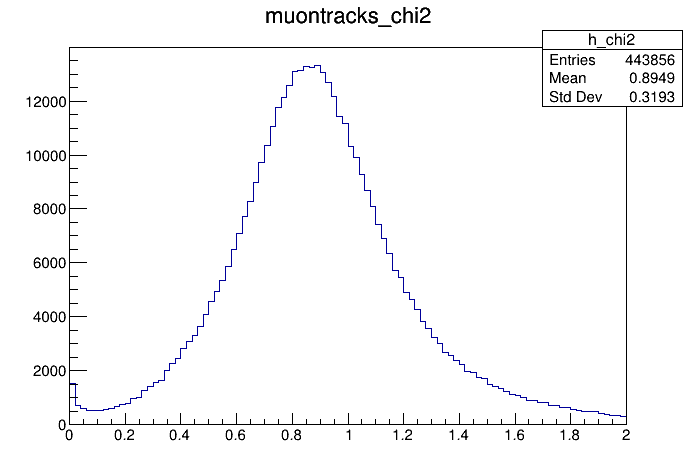

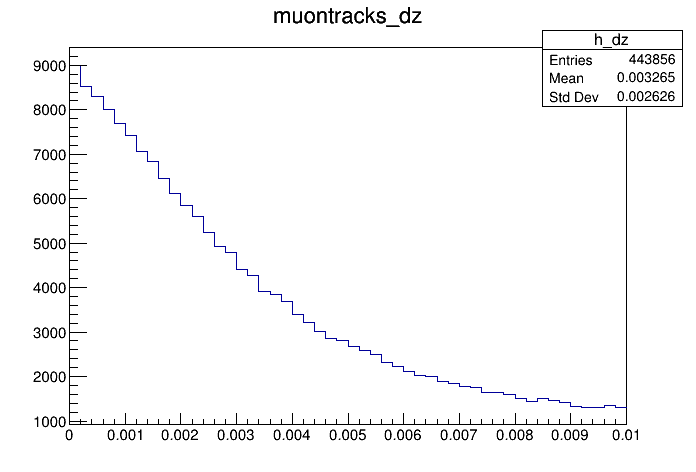

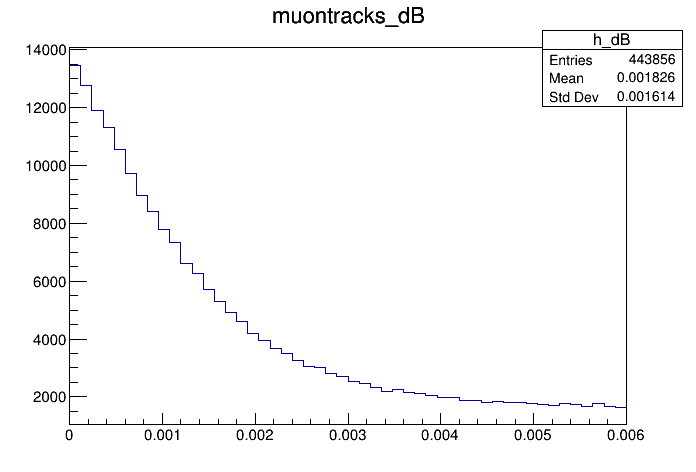

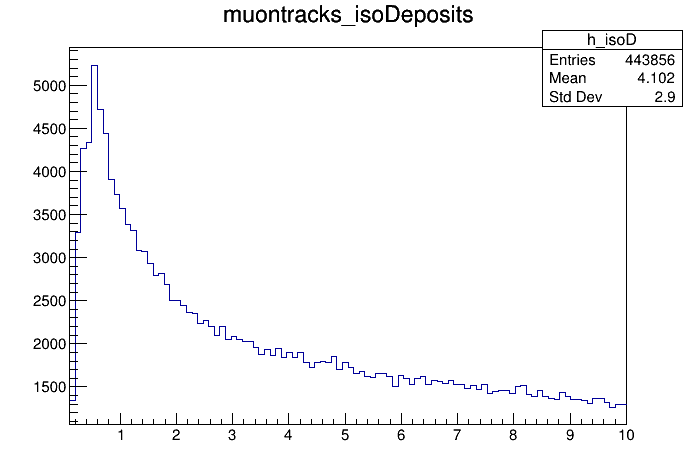

In [4]:
# Blocco inutilizzato
c1=ROOT.TCanvas()
c1.Draw()
tr.Draw("muontracks_chi2>>h_chi2(100,0,2)")

c2=ROOT.TCanvas()
c2.Draw()
tr.Draw("muontracks_dz>>h_dz(50,0,0.01)")

c3=ROOT.TCanvas()
c3.Draw()
tr.Draw("muontracks_dB>>h_dB(50,0,0.006)")

c4=ROOT.TCanvas()
c4.Draw()
tr.Draw("muontracks_isoDeposits>>h_isoD(100,0.1,10)")

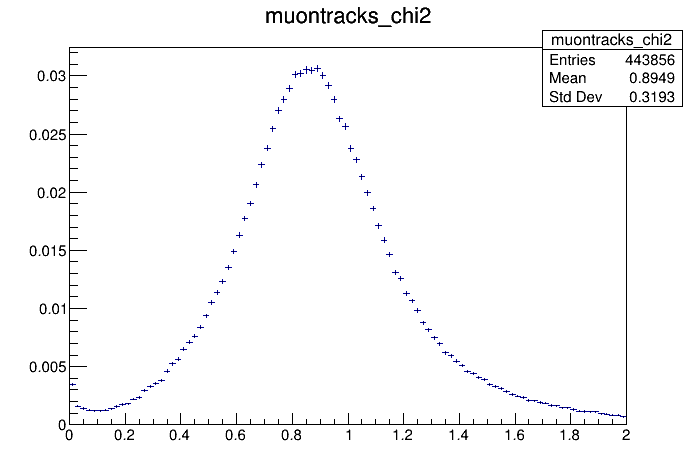

In [5]:
h_chi = ROOT.TH1F("muontracks_chi2","muontracks_chi2", 100, 0, 2)
c1 = ROOT.TCanvas()

for i in range(tr.GetEntries()):
    tr.GetEntry(i)
    for mi in range(tr.muontracks_size):
            chi2 = tr.muontracks_chi2[mi]
            h_chi.Fill(chi2)
c1.Draw()
h_chi.Scale(1/(h_chi.Integral()))
h_chi.Draw()

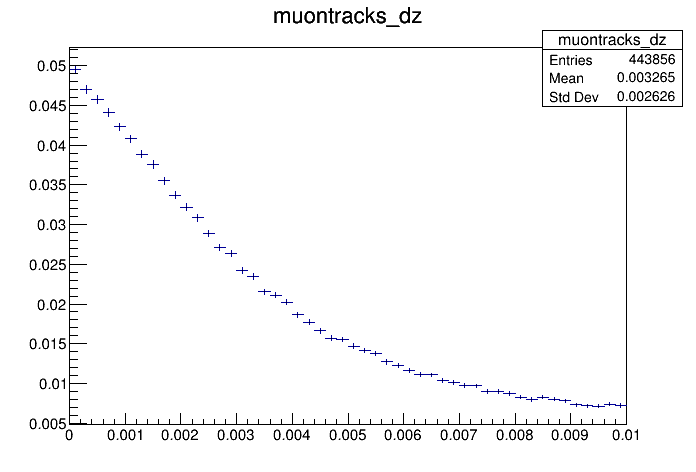

In [7]:
h_dz = ROOT.TH1F("muontracks_dz","muontracks_dz", 50, 0, 0.01)
c2 = ROOT.TCanvas()
for i in range(tr.GetEntries()):
    tr.GetEntry(i)
    for mi in range(tr.muontracks_size):
            dz = tr.muontracks_dz[mi]
            h_dz.Fill(dz)
c2.Draw()
h_dz.Scale(1/(h_dz.Integral()))
h_dz.Draw()

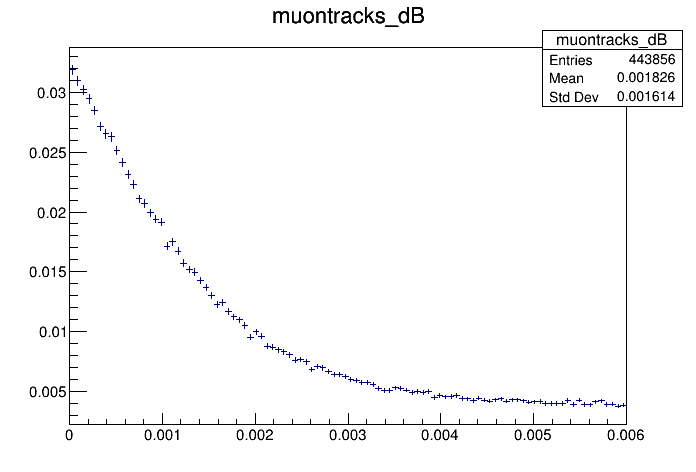

In [9]:
h_dB = ROOT.TH1F("muontracks_dB","muontracks_dB", 100, 0, 0.006)
c3 = ROOT.TCanvas()
for i in range(tr.GetEntries()):
    tr.GetEntry(i)
    for mi in range(tr.muontracks_size):
            dB = tr.muontracks_dB[mi]
            h_dB.Fill(dB)
c3.Draw()
h_dB.Scale(1/(h_dB.Integral()))
h_dB.Draw()

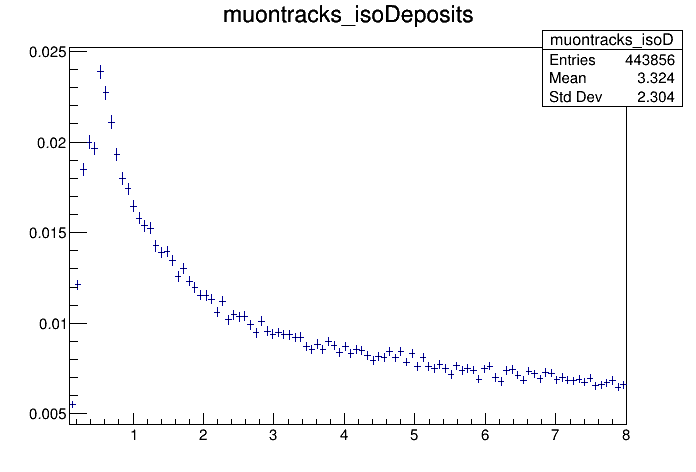

In [11]:
h_isoD = ROOT.TH1F("muontracks_isoD","muontracks_isoDeposits", 100, 0.1, 8)
c4 = ROOT.TCanvas()
for i in range(tr.GetEntries()):
    tr.GetEntry(i)
    for mi in range(tr.muontracks_size):
            isoDeposits = tr.muontracks_isoDeposits[mi]
            h_isoD.Fill(isoDeposits)
c4.Draw()
h_isoD.Scale(1/(h_isoD.Integral()))
h_isoD.Draw()

### Taglio
Qui seguirò i seguenti passaggi:
+ Effettuo un taglio sulla massa invariante di **tutte** le coppie di muoni che ho all'interno di ogni evento
    * Confronto i nuovi istogrammi (normalizzati) con quelli fatti in precedenza per vedere se si osserva qualcosa che ci permetta di discriminare i segnali
    * Lo rifaccio, ma distinguendo OS e SS

Warning in <TFile::Append>: Replacing existing TH1: muontracks_chi2 (Potential memory leak).


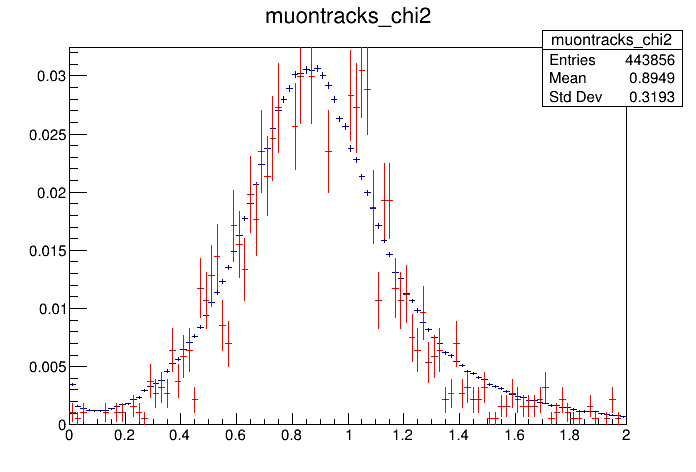

In [6]:
h_chi_f = ROOT.TH1F("muontracks_chi2","muontracks_chi2", 100, 0, 2)
for i in range(tr.GetEntries()):
    tr.GetEntry(i)
    muons=get_collection(tr,"muontracks")
    for mi in range(len(muons)):
        for mj in range(mi):
            s=(muons[mi].p4+muons[mj].p4).M()
            if(s>80 and s<100):
                h_chi_f.Fill(tr.muontracks_chi2[mj])
c1.Draw()
h_chi_f.SetLineColor(ROOT.kRed)
h_chi_f.Scale(1/h_chi_f.Integral())
h_chi_f.Draw("SAME")

Warning in <TFile::Append>: Replacing existing TH1: muontracks_dz (Potential memory leak).


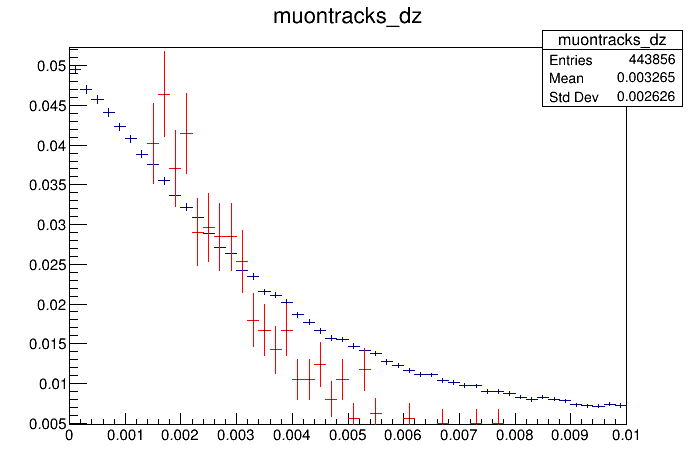

In [8]:
h_dz_f = ROOT.TH1F("muontracks_dz","muontracks_dz", 50, 0, 0.01)
for i in range(tr.GetEntries()):
    tr.GetEntry(i)
    muons=get_collection(tr,"muontracks")
    for mi in range(len(muons)):
        for mj in range(mi):
            s=(muons[mi].p4+muons[mj].p4).M()
            if(s>80 and s<100):
                h_dz_f.Fill(tr.muontracks_dz[mj])
c2.Draw()
h_dz_f.SetLineColor(ROOT.kRed)
h_dz_f.Scale(1/h_dz_f.Integral())
h_dz_f.Draw("SAME")

Warning in <TFile::Append>: Replacing existing TH1: muontracks_dB (Potential memory leak).


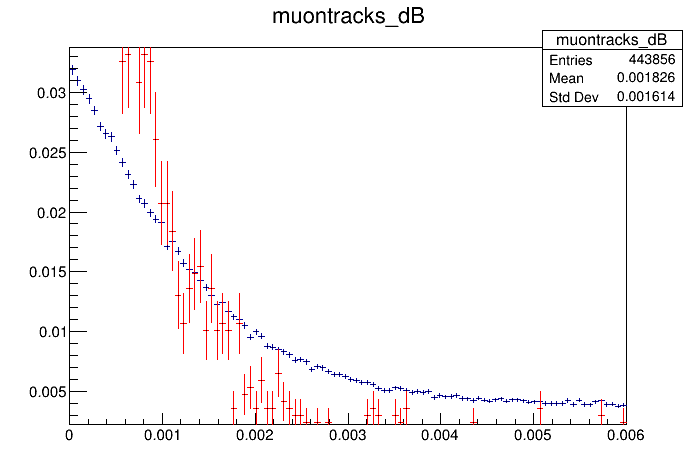

In [10]:
h_dB_f = ROOT.TH1F("muontracks_dB","muontracks_dB", 100, 0, 0.006)
for i in range(tr.GetEntries()):
    tr.GetEntry(i)
    muons=get_collection(tr,"muontracks")
    for mi in range(len(muons)):
        for mj in range(mi):
            s=(muons[mi].p4+muons[mj].p4).M()
            if(s>80 and s<100):
                h_dB_f.Fill(tr.muontracks_dB[mj])
c3.Draw()
h_dB_f.SetLineColor(ROOT.kRed)
h_dB_f.Scale(1/h_dB_f.Integral())
h_dB_f.Draw("SAME")

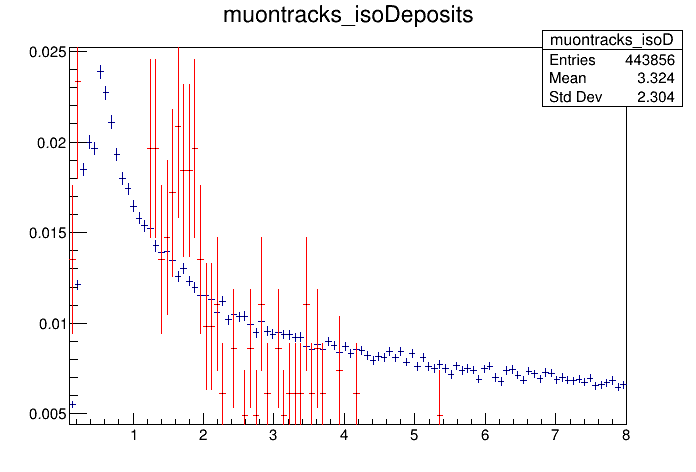

In [12]:
h_iso_f = ROOT.TH1F("muontracks_iso","muontracks_iso", 100, 0.1, 8)
for i in range(tr.GetEntries()):
    tr.GetEntry(i)
    muons=get_collection(tr,"muontracks")
    for mi in range(len(muons)):
        for mj in range(mi):
            s=(muons[mi].p4+muons[mj].p4).M()
            if(s>80 and s<100):
                h_iso_f.Fill(tr.muontracks_isoDeposits[mj])
c4.Draw()
h_iso_f.SetLineColor(ROOT.kRed)
h_iso_f.Scale(1/h_iso_f.Integral())
h_iso_f.Draw("SAME")

Confronto con OS e SS

In [ ]:
are_os = lambda x,y: x.charge*y.charge<0

h_chi_os = ROOT.TH1F("muontracks_chi2","muontracks_chi2", 100, 0, 2)
h_chi_ss = ROOT.TH1F("muontracks_chi2","muontracks_chi2", 100, 0, 2)
c_os=ROOT.TCanvas()

for i in range(tr.GetEntries()):
    tr.GetEntry(i)
    muons=get_collection(tr, "muontracks")
    for mi in range(len(muons)):
        for mj in range(mi):
            if(are_os(muons[mi],muons[mj])):
                s=(muons[mi].p4+muons[mj].p4).M()
                if(s>80 and s<100):
                    h_chi_os.Fill(tr.muontracks_chi2[mj])
            else:
                s=(muons[mi].p4+muons[mj].p4).M()
                if(s>80 and s<100):
                    h_chi_ss.Fill(tr.muontracks_chi2[mj])
c_os.Draw()
h_chi_os.Scale(1/h_chi_os.Integral())
h_chi_ss.Scale(1/h_chi_ss.Integral())
h_chi_ss.SetLineColor(ROOT.kRed)
h_chi_ss.Draw()
h_chi_os.Draw("SAME")